In [245]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [246]:
path = "morrissons_listings.csv"
morrisons = pd.read_csv(path, sep = ",")
morrisons.head()

,wine_type,size (cL),name,price,rating,num_review,country,abv,year,url
0,white,75.0,McGuigan Black Label Shiraz,6.75,3.6,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...
1,white,75.0,Morrisons The Best Touraine Rose,8.00,3.0,4,France,12.5,NaN,https://groceries.morrisons.com/products/morri...
2,white,75.0,McGuigan Black Label Merlot,6.75,4.2,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...
3,white,75.0,Morrisons The Best South African Sauvignon Blanc,7.50,4.0,9,Western Cape,12.5,2021,https://groceries.morrisons.com/products/morri...
4,white,75.0,Hardys Nottage Hill Chardonnay,6.75,3.4,5,Australia,13.5,2017,https://groceries.morrisons.com/products/hardy...


In [247]:
morrisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wine_type   518 non-null    object 
 1   size (cL)   518 non-null    float64
 2   name        518 non-null    object 
 3   price       518 non-null    float64
 4   rating      518 non-null    float64
 5   num_review  518 non-null    int64  
 6   country     496 non-null    object 
 7   abv         509 non-null    float64
 8   year        416 non-null    object 
 9   url         518 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 40.6+ KB


In [248]:
# rename column to size for ease of use
morrisons.rename(columns={"size (cL)" : "size"}, inplace=True)

In [249]:
morrisons["country"].fillna("unknown" , inplace=True)
morrisons['country'] = morrisons['country'].str.replace("U ","unknown")
morrisons['country'] = morrisons['country'].str.replace("British","United Kingdom")
morrisons['country'] = morrisons['country'].str.replace("England","United Kingdom")
morrisons["country"].unique()

array(['Australia', 'France', 'Western Cape', 'New Zealand', 'Italy',
       'Chile', 'South Africa', 'Hungary', 'unknown', 'Spain',
       'California', 'Produce of the EU', 'United States', 'Austria',
       'Portugal', 'Western Australia', 'Germany', 'Argentina', 'U',
       'Marlborough', 'United Kingdom', 'Bulgaria',
       'Moldova (Republic Of)', 'USA', 'Valle Central', 'Bordeaux',
       'Greece', 'Cahors', 'Scotland', ': Portugal',
       'the Island of Madeira'], dtype=object)

In [250]:
# Uniform value for all Non-Vintage years
morrisons['year'] = morrisons['year'].str.replace("NV","Non Vintage")
morrisons['year'].unique()

array(['2021', nan, '2017', '2019', '2020', 'Non Vintage', '2015', '2012',
       '2018', '2016', '2014', '2013', '2022'], dtype=object)

In [251]:
#find duplicate rows
dups = morrisons.duplicated() #checks each row of the dataset and returns TRUE or FALSE depending on whether it is a duplicate
print(dups.any()) #returns TRUE if there is any value in dups that is equal to TRUE
print(morrisons[dups]) #returns the problematic row

True
     wine_type  size                                 name  price  rating  \
256  sparkling  75.0             La Gioiosa Prosecco Brut   10.0     4.7   
338        red  75.0                     Apothic Red Wine    9.5     4.7   
418        red  75.0                   Yellow Tail Malbec    7.0     4.6   
449        red  75.0  Apothic Cabernet Sauvignon Red Wine   10.0     0.0   

     num_review        country   abv         year  \
256           7          Italy  11.0  Non Vintage   
338         208  United States  13.5         2019   
418           7      Australia  13.5         2019   
449           0  United States  13.5         2019   

                                                   url  
256  https://groceries.morrisons.com/products/la-gi...  
338  https://groceries.morrisons.com/products/apoth...  
418  https://groceries.morrisons.com/products/yello...  
449  https://groceries.morrisons.com/products/apoth...  


In [252]:
morrisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wine_type   518 non-null    object 
 1   size        518 non-null    float64
 2   name        518 non-null    object 
 3   price       518 non-null    float64
 4   rating      518 non-null    float64
 5   num_review  518 non-null    int64  
 6   country     518 non-null    object 
 7   abv         509 non-null    float64
 8   year        416 non-null    object 
 9   url         518 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 40.6+ KB


Use the function `.unique()` to take a look at the values taken on by `education`, `years_since_promotion`, and `exit`.

In [253]:
morrisons.isna().any()

wine_type     False
size          False
name          False
price         False
rating        False
num_review    False
country       False
abv            True
year           True
url           False
dtype: bool

In [254]:
morrisons.isna().sum()

wine_type       0
size            0
name            0
price           0
rating          0
num_review      0
country         0
abv             9
year          102
url             0
dtype: int64

In [255]:
morrisons.nunique()

wine_type       5
size            9
name          490
price          81
rating         35
num_review     29
country        31
abv            28
year           12
url           501
dtype: int64

array([3.6, 3. , 4.2, 4. , 3.4, 4.1, 2.8, 3.7, 3.8, 4.8, 2.3, 4.4, 0. ,
       5. , 3.5, 4.3, 4.7, 4.5, 3.3, 1. , 2.9, 2.7, 3.2, 4.6, 2. , 2.5,
       2.6, 4.9, 1.7, 3.9, 2.4, 1.3, 2.2, 1.8, 3.1])

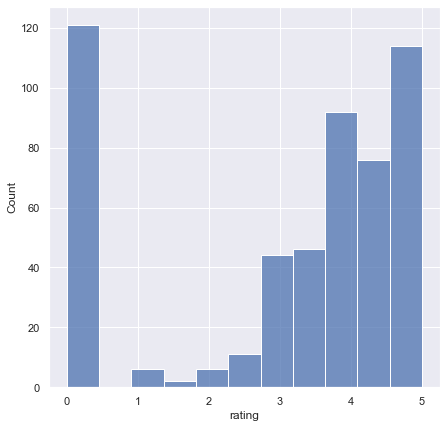

In [256]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(morrisons["rating"])
morrisons["rating"].unique()

array([ 13,   4,   9,   5,   7,   3,  11,   0,   1,   6,   2,   8,  10,
        34,  16,  15,  39,  12,  31,  18, 208,  17,  23,  14,  29,  44,
        48,  19,  33], dtype=int64)

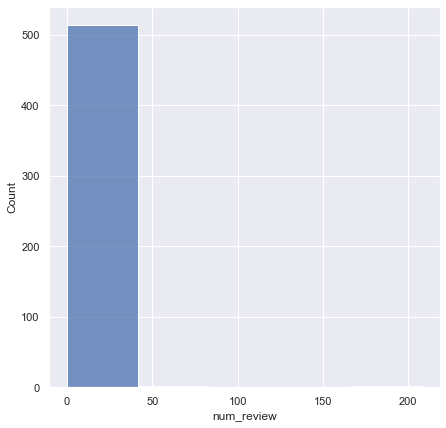

In [257]:
# Histogram plots for number of reviews
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(morrisons["num_review"], kde=False, bins=5)
morrisons["num_review"].unique()

array(['white', 'rose', 'sparkling', 'red', 'fortified_and_other'],
      dtype=object)

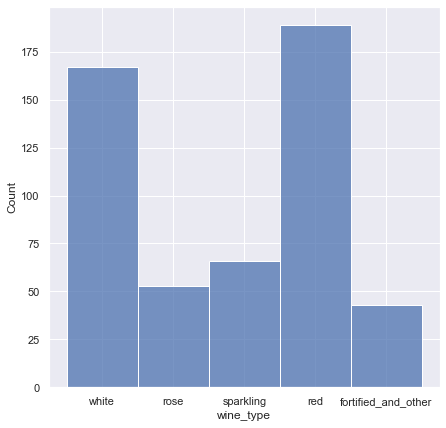

In [258]:
# Histogram plots for wine type
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(morrisons["wine_type"])
morrisons["wine_type"].unique()

array([ 75. ,  18.7, 225. ,  37.5, 100. , 150. ,  20. ,  70. ,  12.5])

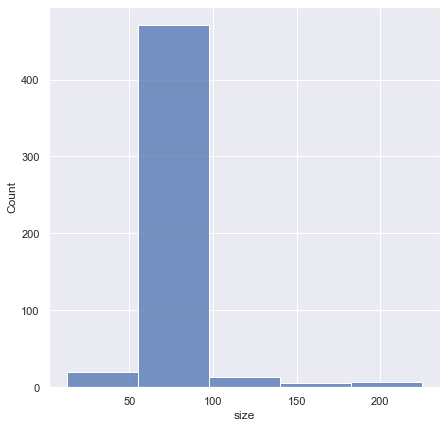

In [259]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(morrisons["size"], kde=False, bins=5)
morrisons["size"].unique()

<AxesSubplot:xlabel='abv', ylabel='Count'>

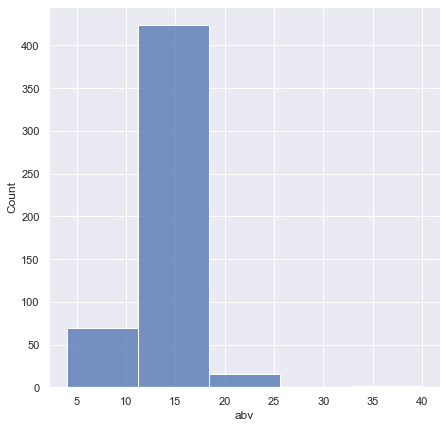

In [260]:
# Histogram plot of ABV

sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(morrisons["abv"], kde=False,bins=5)

In [261]:
morrisons.describe()

# Compute % of missing values
morrisons["abv"].isna().sum()/len(morrisons["abv"])*100

# As the % of missing values is very small, we will drop the rows having abv value as NA
morrisons.dropna(subset = ["abv"], inplace=True)

morrisons["abv"].isna().sum()


0

<AxesSubplot:xlabel='year', ylabel='Count'>

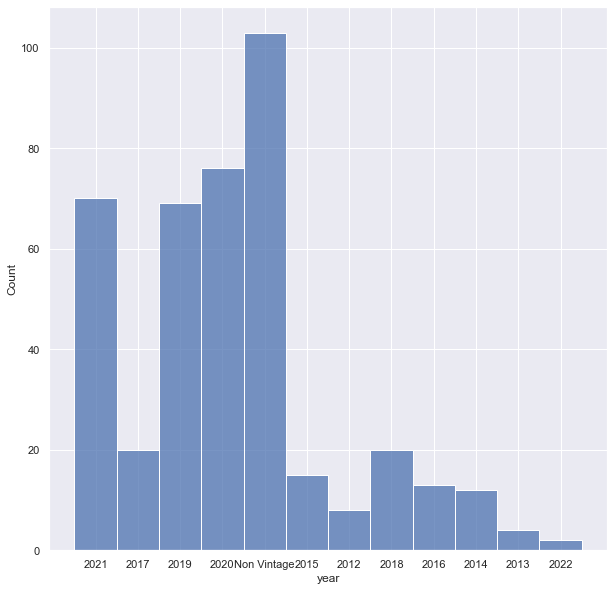

In [262]:
# Histogram plot of year

morrisons["year"].isna().sum()/len(morrisons["year"])*100
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(morrisons["year"], bins=30)

# As only 5% is missing, we will keep it as is and can use other column values for analysis 

In [263]:
morrisons = morrisons.reset_index()

In [264]:
year2 = morrisons["year"].apply(pd.to_numeric, errors = "coerce")
# Feature Engineering

morrisons2 = pd.DataFrame(year2)
morrisons2.info()
morrisons.loc[:, "age"] = 2022 - morrisons2['year']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    309 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [265]:
# Creating a column with ratings >5
for i, num in enumerate(morrisons["num_review"]):
    if num > 5:
        morrisons.loc[i, "score"] = morrisons.loc[i, "rating"]
    else:
        morrisons.loc[i, "score"] = 0

In [266]:
morrisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       509 non-null    int64  
 1   wine_type   509 non-null    object 
 2   size        509 non-null    float64
 3   name        509 non-null    object 
 4   price       509 non-null    float64
 5   rating      509 non-null    float64
 6   num_review  509 non-null    int64  
 7   country     509 non-null    object 
 8   abv         509 non-null    float64
 9   year        412 non-null    object 
 10  url         509 non-null    object 
 11  age         309 non-null    float64
 12  score       509 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 51.8+ KB


In [267]:
# Impute size to most frequent value

impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
morrisons[["size"]]=impute.fit_transform(morrisons[["size"]])


# To scale size
for i, size in enumerate(morrisons["size"]):
    morrisons.loc[i, "scaledprice"] = morrisons.loc[i, "price"] * 75 / size

morrisons.loc[morrisons["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
morrisons.loc[:, "logprice"] = np.log10(morrisons.loc[:,"scaledprice"])

In [268]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

morrisons["countrycode"] = [countries.get(c, "unknown") for c in morrisons["country"]]
morrisons.head()

,index,wine_type,size,name,price,rating,num_review,country,abv,year,url,age,score,scaledprice,logprice,countrycode
0,0,white,75.0,McGuigan Black Label Shiraz,6.75,3.6,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,1.0,3.6,6.75,0.829304,AUS
1,1,white,75.0,Morrisons The Best Touraine Rose,8.00,3.0,4,France,12.5,NaN,https://groceries.morrisons.com/products/morri...,NaN,0.0,8.00,0.903090,FRA
2,2,white,75.0,McGuigan Black Label Merlot,6.75,4.2,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,1.0,4.2,6.75,0.829304,AUS
3,3,white,75.0,Morrisons The Best South African Sauvignon Blanc,7.50,4.0,9,Western Cape,12.5,2021,https://groceries.morrisons.com/products/morri...,1.0,4.0,7.50,0.875061,unknown
4,4,white,75.0,Hardys Nottage Hill Chardonnay,6.75,3.4,5,Australia,13.5,2017,https://groceries.morrisons.com/products/hardy...,5.0,0.0,6.75,0.829304,AUS


<AxesSubplot:>

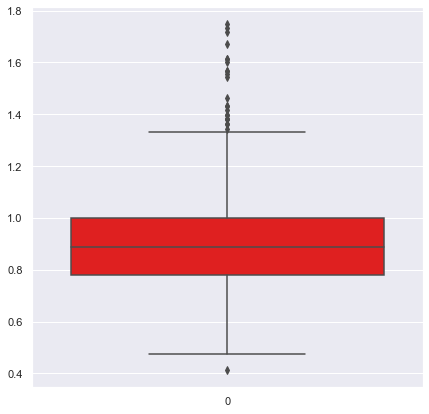

In [269]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(7,7)})

sns.boxplot(data=np.log10(morrisons["scaledprice"]), color= "red")

<AxesSubplot:xlabel='Count', ylabel='country'>

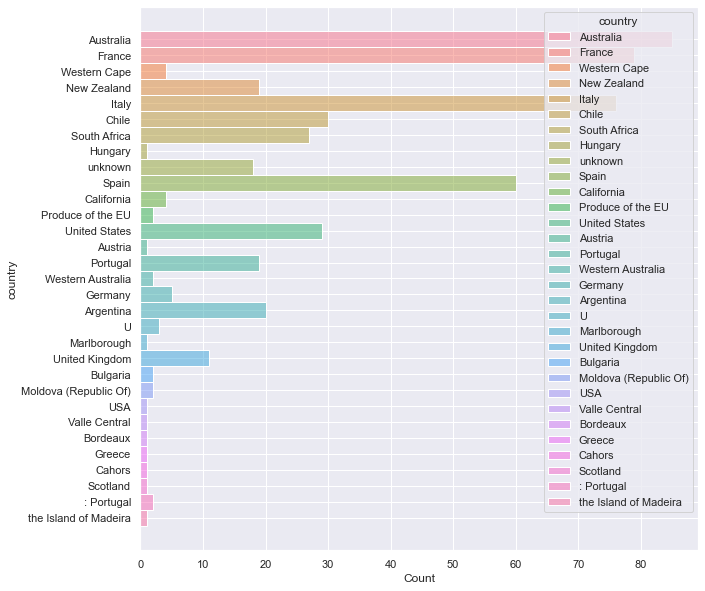

In [270]:
# Countries visualisation
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(data=morrisons, y="country", hue="country")

<AxesSubplot:xlabel='wine_type', ylabel='num_review'>

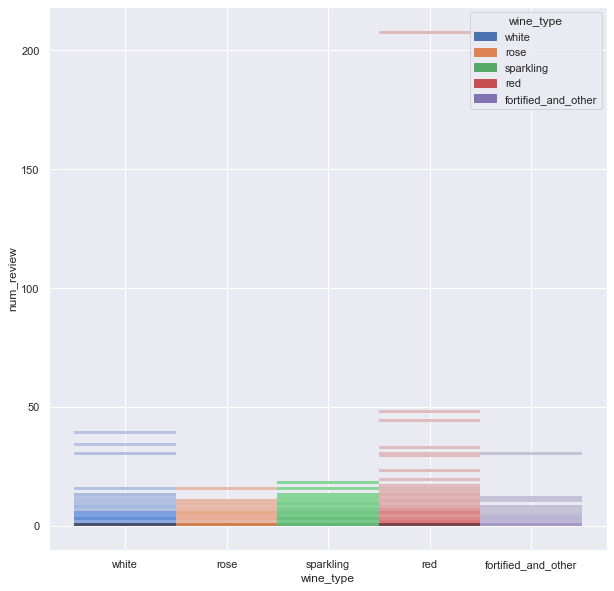

In [271]:
# Countries visualisation

sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(data=morrisons, x = "wine_type", y="num_review", hue="wine_type")

<AxesSubplot:xlabel='wine_type', ylabel='logprice'>

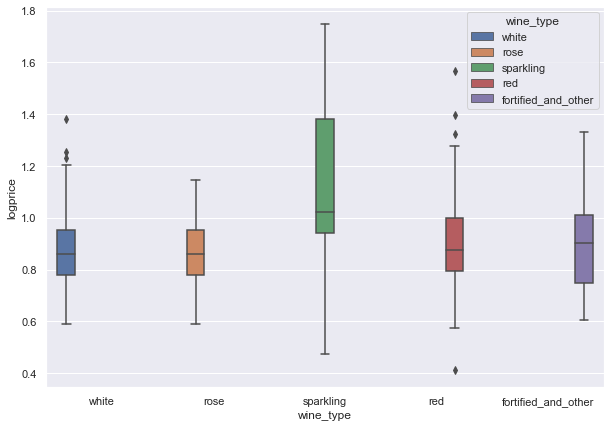

In [272]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(10,7)})

sns.boxplot(
    data=morrisons,
    x="wine_type", y="logprice", hue="wine_type"
)

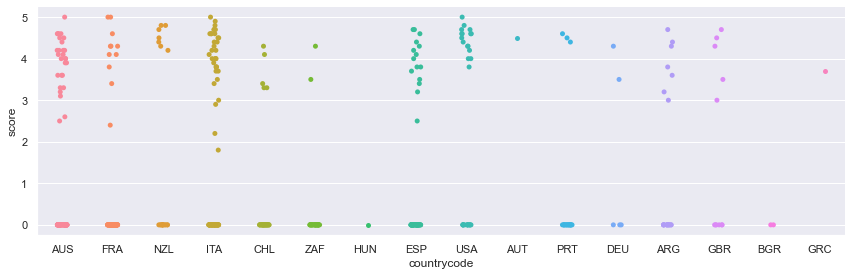

In [273]:
# plot country vs review ratings

sns.catplot(data=morrisons.loc[morrisons["countrycode"]!="unknown"], x="countrycode", y="score", height=4, aspect=3)

Text(0.5, 0, 'LogPrice')

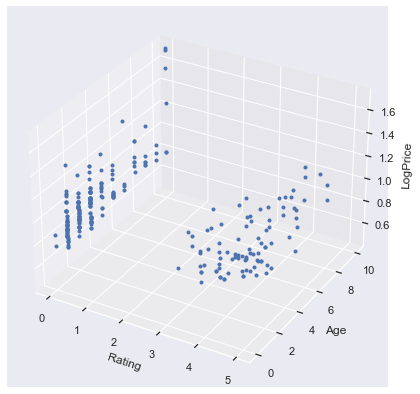

In [274]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(morrisons["score"], morrisons["age"], morrisons["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")

In [275]:
morrisons.head()

,index,wine_type,size,name,price,rating,num_review,country,abv,year,url,age,score,scaledprice,logprice,countrycode
0,0,white,75.0,McGuigan Black Label Shiraz,6.75,3.6,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,1.0,3.6,6.75,0.829304,AUS
1,1,white,75.0,Morrisons The Best Touraine Rose,8.00,3.0,4,France,12.5,NaN,https://groceries.morrisons.com/products/morri...,NaN,0.0,8.00,0.903090,FRA
2,2,white,75.0,McGuigan Black Label Merlot,6.75,4.2,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,1.0,4.2,6.75,0.829304,AUS
3,3,white,75.0,Morrisons The Best South African Sauvignon Blanc,7.50,4.0,9,Western Cape,12.5,2021,https://groceries.morrisons.com/products/morri...,1.0,4.0,7.50,0.875061,unknown
4,4,white,75.0,Hardys Nottage Hill Chardonnay,6.75,3.4,5,Australia,13.5,2017,https://groceries.morrisons.com/products/hardy...,5.0,0.0,6.75,0.829304,AUS


In [276]:
morrisons_to_merge = morrisons[['name', 'wine_type', 'country', 'year','price','scaledprice', 'score', 'num_review', 'abv', 'size','age','logprice']]
morrisons_to_merge.head(20)


,name,wine_type,country,year,price,scaledprice,score,num_review,abv,size,age,logprice
0,McGuigan Black Label Shiraz,white,Australia,2021,6.75,6.75,3.6,13,12.5,75.0,1.0,0.829304
1,Morrisons The Best Touraine Rose,white,France,NaN,8.00,8.00,0.0,4,12.5,75.0,NaN,0.903090
2,McGuigan Black Label Merlot,white,Australia,2021,6.75,6.75,4.2,13,12.5,75.0,1.0,0.829304
3,Morrisons The Best South African Sauvignon Blanc,white,Western Cape,2021,7.50,7.50,4.0,9,12.5,75.0,1.0,0.875061
4,Hardys Nottage Hill Chardonnay,white,Australia,2017,6.75,6.75,0.0,5,13.5,75.0,5.0,0.829304
5,McGuigan Black Label Pinot Grigio,white,Australia,2021,6.75,6.75,4.1,7,11.5,75.0,1.0,0.829304
6,McGuigan Black Label Chardonnay,white,Australia,2021,6.75,6.75,0.0,4,12.5,75.0,1.0,0.829304
7,Morrisons The Best Marlborough Sauvignon Blanc,white,New Zealand,2019,9.00,9.00,0.0,3,12.5,75.0,3.0,0.954243
8,Veluti Pinot Grigio,white,Italy,2020,6.25,6.25,3.8,13,12.5,75.0,2.0,0.795880
9,The Ned Sauvignon Blanc,white,New Zealand,2020,10.00,10.00,0.0,4,13.0,75.0,2.0,1.000000


In [277]:
# rename column to size for ease of use
morrisons_to_merge.rename(columns={'size' : 'size (cL)'}, inplace=True)
morrisons_to_merge.head()

C:\Users\aparn\AppData\Local\Temp\ipykernel_28156\3801794974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morrisons_to_merge.rename(columns={'size' : 'size (cL)'}, inplace=True)


,name,wine_type,country,year,price,scaledprice,score,num_review,abv,size (cL),age,logprice
0,McGuigan Black Label Shiraz,white,Australia,2021,6.75,6.75,3.6,13,12.5,75.0,1.0,0.829304
1,Morrisons The Best Touraine Rose,white,France,NaN,8.00,8.00,0.0,4,12.5,75.0,NaN,0.903090
2,McGuigan Black Label Merlot,white,Australia,2021,6.75,6.75,4.2,13,12.5,75.0,1.0,0.829304
3,Morrisons The Best South African Sauvignon Blanc,white,Western Cape,2021,7.50,7.50,4.0,9,12.5,75.0,1.0,0.875061
4,Hardys Nottage Hill Chardonnay,white,Australia,2017,6.75,6.75,0.0,5,13.5,75.0,5.0,0.829304


In [279]:
morrisons_to_merge.to_csv('morrissons_to_merge.csv')